In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager, rc
import platform

# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [27]:
perch_lenght = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [32]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = \
    train_test_split(perch_lenght, perch_weight, random_state=42)

In [ ]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

## 다항회귀분석
### 다항회귀 : 다항식을 사용한 선형회귀
- 다항식(이차방정식) : y=ax2 + bx + c
- a와 b : 계수(기울기포함)
- c : y절편

In [1]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [95]:
train_poly = np.column_stack((train_input**2, train_input))
train_poly.shape

(42, 2)

In [97]:
test_poly = np.column_stack((test_input**2, test_input))
test_poly.shape

(14, 2)

In [ ]:
# - 객체(모델) 생성
# - 훈련모델 생성
# - 예측데이터 : 길이 50으로 무게 예측
# - 계수 확인 (coef_, intercept_)
# - 산점도 그리기 : 훈련데이터, 예측데이터, 추세선

In [98]:
lr_poly = LinearRegression()

In [99]:
lr_poly.fit(train_poly, train_target)

LinearRegression()

In [104]:
lr_poly.score(train_poly, train_target)

0.9706807451768623

In [105]:
lr_poly.score(test_poly, test_target)

0.9775935108325121

In [143]:
nfish_poly = [[50**2, 50]]

In [145]:
lr_poly.predict(nfish_poly)

array([1573.98423528])

In [106]:
print(lr_poly.coef_, lr_poly.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


In [165]:
lr_poly.coef_[0]

1.0143321093767304

In [174]:
np.arange(15,51)

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50])

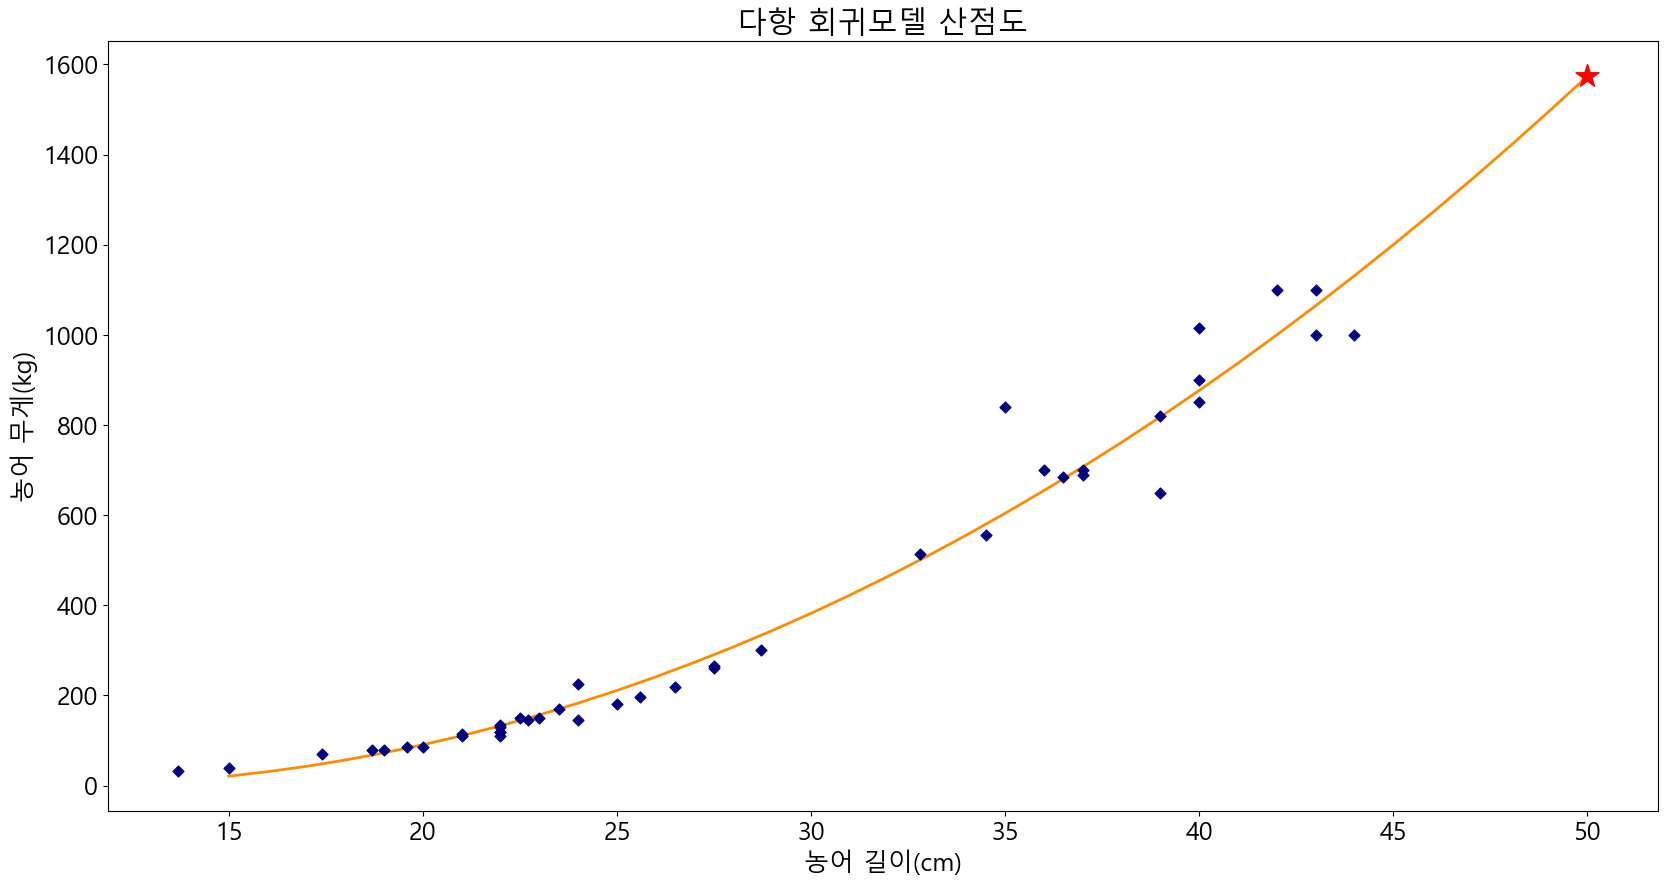

In [179]:
## 추세선을 이용한 예측데이터 예측 가능여부 확인하기
    # - 예측데이터로 사용할 수 있는지 확인
    # - 산점도를 이용한 확인
    # - 훈련데이터, 예측데이터 산점도로 그리기
    
# 다항 회귀 모델 산점도
fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)
plt.title('다항 회귀모델 산점도')

plt.scatter(train_input, train_target, marker='D',s=30, c='navy')
plt.scatter(nfish_poly[0][1], lr_poly.predict(nfish_poly), marker='*', s=300, c='red')

# # 추세선 그리기
# # 추세선 : 다항회귀 알고리즘(2차방정식)이 훈련데이터에서 찾은 최적의 곡선
point = np.arange(15,51)
plt.plot(point, lr_poly.coef_[0] * point **2 + lr_poly.coef_[1] * point + lr_poly.intercept_ , color = 'darkorange',zorder =0)

plt.rcParams['lines.linewidth'] = 2

plt.xlabel('농어 길이(cm)')
plt.ylabel('농어 무게(kg)')
plt.show()

In [188]:
# 과적합 확인하기
print('  훈련 :',lr_poly.score(train_poly, train_target))
print('테스트 :',lr_poly.score(test_poly, test_target))

# 테스트 데이터가 결정계수가 조금 더 높음
# 현업에서는 사용가능하지만
# 학문적으로는 인정하지 않는다 (논문, 연구, 특허)

  훈련 : 0.9706807451768623
테스트 : 0.9775935108325121


In [2]:
# <해석>
# 전체적으로 정확도는 조금 낮아졌습니다.
# 그러나, 훈련/테스트의 결정계수는 유사하게 가까워 졌기에,
# 우수한 모델이라고 할 수 있습니다.

# 다만 아직 훈련이 테스트보다 낮은 과소적합을 보입니다.
# <과소적합 해결방안>
    # - 복잡도를 줄 수 있는 모델 찾기 > 다중회귀분석